# Sample using Github Event Data for Analysis

In [1]:
import pandas as pd
from fidap import fidap_client
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import config

In [2]:
fidap = fidap_client(db="sf_gcp", api_key=config.FIDAP_API_KEY)

# Github Event Questions

## How many PR's were made in the current month of February?

In [3]:
count_prs = fidap.sql("""select count(*) as number_of_prs from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'PullRequestEvent'""")
print(f'There were {count_prs.values[0][0]} PRs made in this month so far.')

There were 1412398 PRs made in this month so far.


## Which Users Made the most PR's this month (excluding bots or users with bot in their names)?

In [4]:
users_prs = fidap.sql("""select count(*) as number_of_prs, "username" from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'PullRequestEvent' and "username" not like '%bot%' group by "username" order by number_of_prs desc;""")

### Table of Top 5 Users

In [5]:
users_prs.head(5)

,number_of_prs,username
0,34713,rozierguillaume
1,15742,direwolf-github
2,3191,beefybill1
3,3006,eyt5rfyt
4,2583,scala-steward


### WordCloud of Top 50 Users

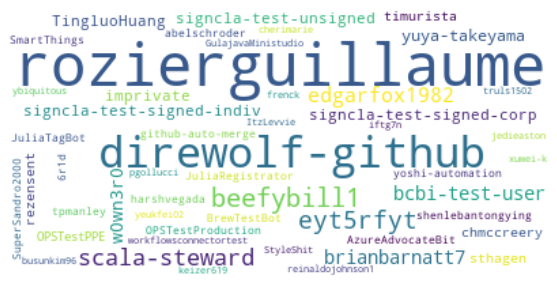

In [6]:
values = {}
for count, user in users_prs.values:
    values[user] = count
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white")
wordcloud.generate_from_frequencies(frequencies=values)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## How many PR's were made per day for the month?

In [7]:
day_prs = fidap.sql("""select count(*) as number_of_prs, TO_DATE("created_at") as "date_created" from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'PullRequestEvent' group by "date_created" order by number_of_prs desc;""")

In [8]:
day_prs['date_created'] = pd.to_datetime(day_prs['date_created'],unit='ms').dt.strftime('%Y-%m-%d')

### Table of Daily PR Count

In [9]:
day_prs

,number_of_prs,date_created
0,627433,2021-04-01
1,269933,2021-04-05
2,228459,2021-04-02
3,143380,2021-04-03
4,143193,2021-04-04


### Bar Chart to Show Tallies

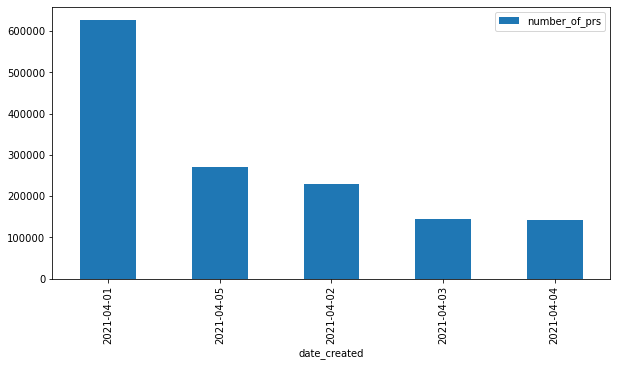

In [10]:
ax = day_prs.plot.bar(x='date_created', y='number_of_prs', rot=90, figsize=(10,5))

## Which user made the most PR's to a particular Repo this month?

In [11]:
users_prs = fidap.sql("""select count(*) as number_of_prs, "username", "repo_name" from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'PullRequestEvent' and "username" not like '%bot%' group by "repo_name", "username" order by number_of_prs desc;""")

### Table of Top 5 Users

In [12]:
users_prs.head(5)

,number_of_prs,username,repo_name
0,34695,rozierguillaume,rozierguillaume/vitemadose
1,1671,bcbi-test-user,bcbi-test/compathelper_integration_test_repo.jl
2,1116,yuya-takeyama,yuya-takeyama/monorepo-manifests
3,1028,imprivate,itsprivate/ts
4,955,signcla-test-signed-indiv,google-test/signcla-probe-repo


## How many Code Pushes were made in the current month?

In [13]:
count_push = fidap.sql("""select count(*) as number_of_prs from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'PushEvent'""")
print(f'There were {count_push.values[0][0]} code pushes made in this month so far.')

There were 6803951 code pushes made in this month so far.


## Which users made the most code pushes to any repo?

In [14]:
users_pushes = fidap.sql("""select count(*) as number_of_pushes, "username" from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'PushEvent' and "username" not like '%bot%' and "username" not like '%Bot%' group by "username" order by number_of_pushes desc;""")

### Table of Top Users

In [15]:
users_pushes.head(5)

,number_of_pushes,username
0,189277,jinmanshe
1,53013,milesholt
2,23614,makryan77
3,20591,weather-now-data2
4,20040,rozierguillaume


### Word Cloud of Top Code Pushers

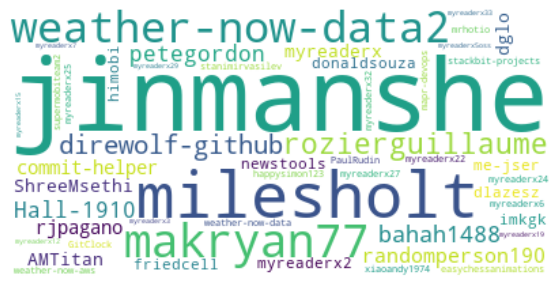

In [16]:
values = {}
for count, user in users_pushes.values:
    values[user] = count
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white")
wordcloud.generate_from_frequencies(frequencies=values)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Which Repositories had the most PR's (Most Requested Changes) made in the month?

In [17]:
repo_prs = fidap.sql("""select "repo_name", count(*) as number_of_prs from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'PullRequestEvent' group by "repo_name" order by number_of_prs desc;""")

### Top 10 Repos table

In [18]:
repo_prs.head(10)

,repo_name,number_of_prs
0,rozierguillaume/vitemadose,34695
1,google-test/signcla-probe-repo,2862
2,actions-canary/ForkPRCanary,1776
3,bcbi-test/compathelper_integration_test_repo.jl,1671
4,rms-support-letter/rms-support-letter.github.io,1427
5,test-organization-kkjeer/app-test,1261
6,rezensent/rezensent-test,1201
7,yuya-takeyama/monorepo-manifests,1116
8,test-organization-kkjeer/bot-validation,1085
9,KnisterPeter/rezensent-test,1083


## Which Repositories were starred the most in the month?

In [19]:
repo_stars = fidap.sql("""select "repo_name", count(*) as number_of_stars from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'WatchEvent' group by "repo_name" order by number_of_stars desc;""")

In [20]:
repo_star_30 = repo_stars.head(30)

In [21]:
print(f'{repo_star_30.values[0][0]} was the most popular repository and was starred {repo_star_30.values[0][1]} times in the month to date')

jwasham/coding-interview-university was the most popular repository and was starred 2969 times in the month to date


### Most Starred/Popular Repos Bar Chart (Top 30)

<AxesSubplot:xlabel='repo_name'>

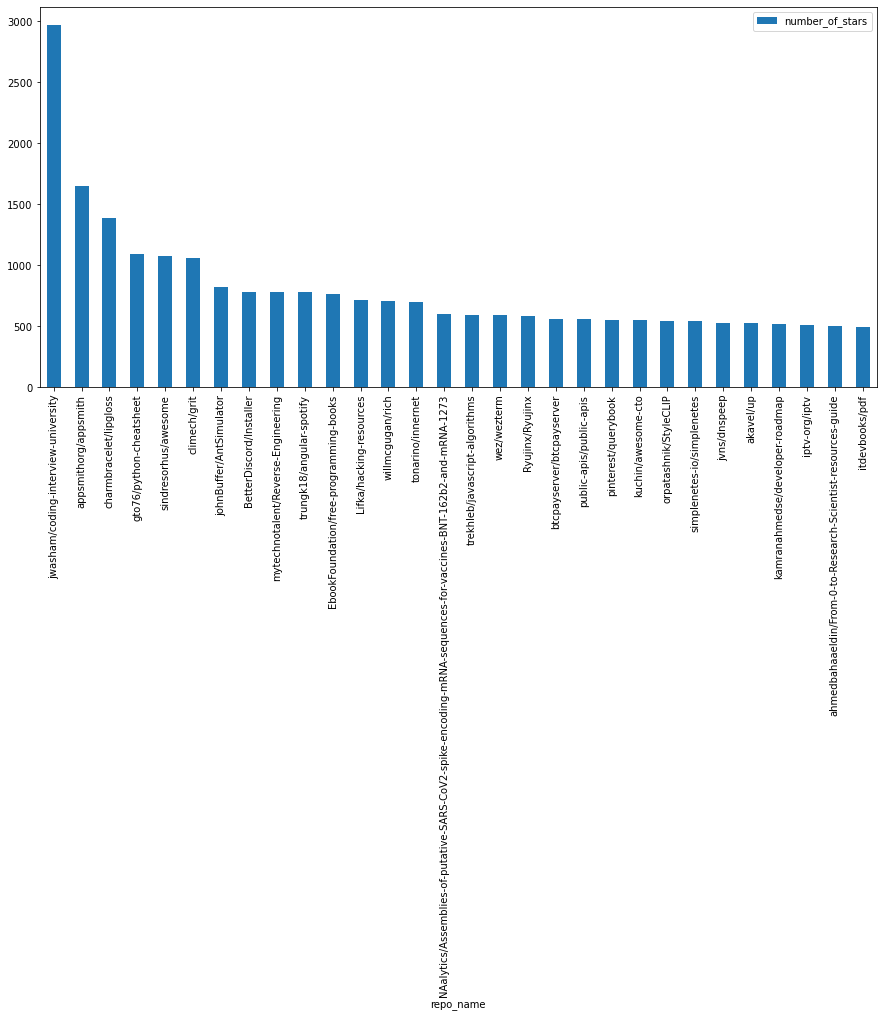

In [22]:
repo_star_30.plot.bar(x='repo_name', y='number_of_stars', rot=90, figsize=(15,7))

### Top 10 Table

In [23]:
repo_stars.head(10)

,repo_name,number_of_stars
0,jwasham/coding-interview-university,2969
1,appsmithorg/appsmith,1647
2,charmbracelet/lipgloss,1391
3,gto76/python-cheatsheet,1094
4,sindresorhus/awesome,1077
5,climech/grit,1062
6,johnBuffer/AntSimulator,821
7,BetterDiscord/Installer,782
8,mytechnotalent/Reverse-Engineering,781
9,trungk18/angular-spotify,781


### Breakdown by day

In [24]:
repo_stars_day = fidap.sql("""select "repo_name", count(*) as number_of_stars, TO_DATE("created_at") as "date_created" from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'WatchEvent' group by "repo_name", "date_created" order by "date_created" asc;""")

In [25]:
repo_stars_day['date_created'] = pd.to_datetime(repo_stars_day['date_created'],unit='ms').dt.strftime('%Y-%m-%d')

In [26]:
repo_stars_day.head(10)

,repo_name,number_of_stars,date_created
0,ept/invoicing,1,2021-04-01
1,eta-dev/eta,1,2021-04-01
2,gaganmalvi/cartyx,1,2021-04-01
3,coleifer/walrus,1,2021-04-01
4,google/protobuf-gradle-plugin,1,2021-04-01
5,jt86/SVM-Delta-Plus,1,2021-04-01
6,David-Haim/concurrencpp,2,2021-04-01
7,cangming99/gedoor-Build,1,2021-04-01
8,pinecrew/electron-phonon-scattering-2d,1,2021-04-01
9,encse/adventofcode,1,2021-04-01
